In [11]:
import finance4py as fp

import matplotlib.pyplot as plt
from matplotlib import pylab
import pandas as pd

from pandas_datareader.data import DataReader

%matplotlib inline
pylab.rcParams['figure.figsize'] = (10, 6)

## finance4py plotting example
In this example I'm going to evaluate different indicator and plot them one using pyplot subplots.

In [2]:
# reading data from google finance
stock = DataReader('NFLX', 'google')

In [3]:
# extract bollinger bands
boll_bands = fp.bbands(stock.Close)

In [4]:
# extract average true range
atr = fp.average_true_range(stock)

In [5]:
# extract RSI
rsi = fp.rsi(stock)

In [13]:
# extract MACD
macd = fp.macd(stock)
macd.head()

,MACD_12_26,MACDsign_12_26,MACDdiff_12_26
Date,,,
2010-01-04,NaN,NaN,NaN
2010-01-05,NaN,NaN,NaN
2010-01-06,NaN,NaN,NaN
2010-01-07,NaN,NaN,NaN
2010-01-08,NaN,NaN,NaN


## Problems

There are some problems here:

- The price plot must be bigger than the other ones.
- The MACD plot must have a barplot inside
- I had problem plotting the volume as a barchart, altough I did't try hard to solve this one.

One possible solution could be, and I think this is how I'm going to implement it, to use the class StockDataFrame, in which every possible indicator should have the capability to plot itself in the appropriate way.

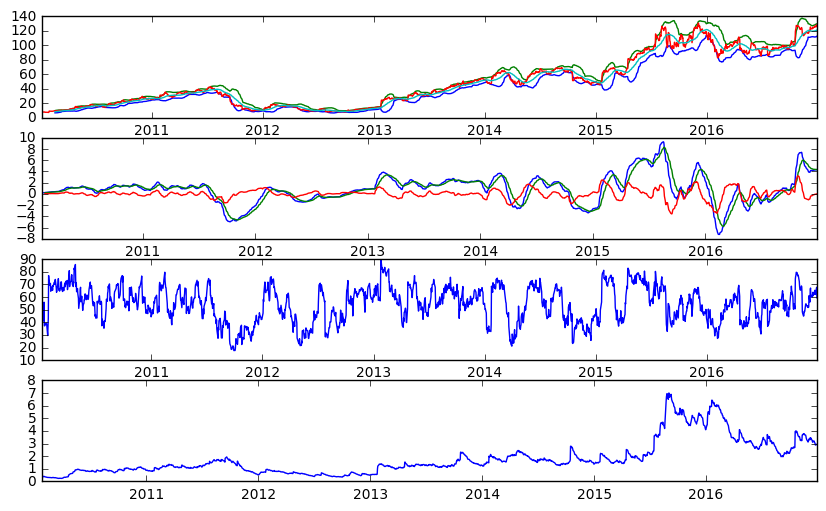

In [12]:
plt.figure(1)
plt.subplot(411)
plt.plot(boll_bands)

plt.subplot(412)
plt.plot(macd)

plt.subplot(413)
plt.plot(rsi)

plt.subplot(414)
plt.plot(atr['ATR'])